In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

In [2]:
x, y = fetch_olivetti_faces(return_X_y=True)

In [3]:
x.shape, y.shape

((400, 4096), (400,))

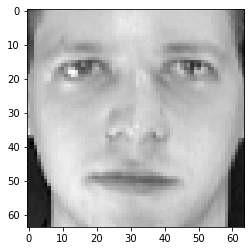

In [4]:
plt.imshow(x[0].reshape(64, 64), cmap='gray')
plt.show()

## Создание матрицы обучающих векторов

In [5]:
X = x.T
X.shape

(4096, 400)

`N = 64`, `M = 400`

$X \in R^{N^2 \times M}$

#### Zero mean

$$x_{ij} = x_{ij} - \mu_i, \mu_i = \frac{1}{n}\sum\limits_{j=1}^n x_{ij}$$

In [6]:
mean = np.mean(X, axis=1).reshape(-1, 1)

In [7]:
X_zero_mean = X - mean
X_zero_mean.shape

(4096, 400)

### Unit Variance

$$x_{ij} = \frac{x_{ij}}{\sigma_j}, \sigma_i = \frac{1}{n-1}\sum\limits_{j=1}^n (x_{ij} - \mu_i)^2$$

In [8]:
std = np.std(X_zero_mean, axis=1, ddof=1).reshape(-1, 1)

In [9]:
unit_variance = X_zero_mean / std
unit_variance.shape

(4096, 400)

### Covariance matrix

Необходимо найти матрицу ковариации $XX^T$, но она будет иметь размерность $N^2 \cdot N^2$ и высчитывать собственные значения тяжело. Легче вычислить матрицу ковариации $Cov = X^TX$, а потом получить собственные вектора следующим образом:
$$X^Tv_i = \lambda_i v_i$$
$$XX^TXv_i = \lambda_i X v_i$$
$$Cu_i = \lambda_iu_i$$
где $C = XX^T$, и $u_i = Xv_i$

In [10]:
pseudo_covariance_matrix = unit_variance.T @ unit_variance

In [11]:
pseudo_covariance_matrix.shape

(400, 400)

In [12]:
eigvalues, eigvectors = np.linalg.eig(pseudo_covariance_matrix)

In [13]:
eigvectors.shape

(400, 400)

#### Compute eigenvectors

In [14]:
max_eig_vectors_covar_matrix = unit_variance @ eigvectors
max_eig_vectors_covar_matrix.shape

(4096, 400)

### Project X onto K Principal components

Теперь выберем `k=10` собственных векторов, соответствующих наибольшим собственным числам.

In [15]:
k = 10
index = eigvalues.argsort()[::-1][:10]

In [16]:
take_largest = max_eig_vectors_covar_matrix[:, index]
take_largest.shape

(4096, 10)

`take_largest` - eigenfaces $R^{N^2 \times k}$

`X_zero_mean` - $R^{N^2 \times M}$

In [17]:
Y = take_largest.T @ X_zero_mean

`Y` - $R^{k \times n}$

In [18]:
Y.shape #k x n

(10, 400)

Отобразим первые десять собственных векторов (лиц - `eigenfaces`), полученных на обучаемом наборе.

In [19]:
eigenfaces_reshaped = take_largest.reshape(64, 64, 10)

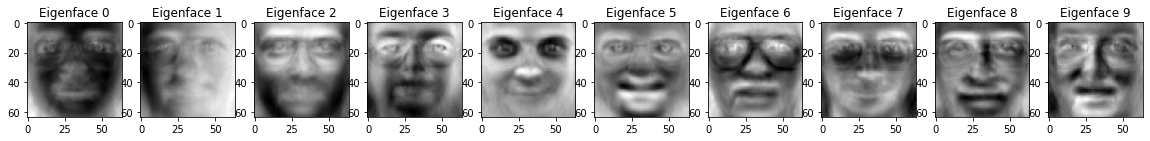

In [20]:
fig, ax = plt.subplots(1, 10, figsize=(20, 30))
for i in range(0, 10):
    ax[i].imshow(eigenfaces_reshaped[:, :, i], cmap='gray')
    ax[i].set_title(f'Eigenface {i}')

plt.show()

Пример построения человеческого лица с помощью кобминации собственных лиц и главных компонент.

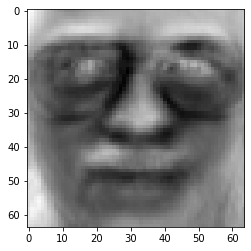

In [21]:
plt.imshow(0.9 * eigenfaces_reshaped[:, :, 4] -0.9 * eigenfaces_reshaped[:, :, 9] + 2 * eigenfaces_reshaped[:, :, 6], cmap='gray')